In [2]:
# import dependencies
import random # random to generate random latitude and longitudes
import pandas as pd # pandas library
import time 
import seaborn as sns # seaborn library to set the aesthetics for the graphs
import matplotlib.pyplot as plt # for creating/plotting graphs
import numpy as np
from datetime import datetime
import openweathermapy as owm
import csv

In [3]:
# citypy library - to Look up for city names with geo-coordinates
from citipy import citipy 
cities = []

while len(cities)<550:
    x = (random.choice(range(-90,90))) # randomly generate numbers in range -90 & 90 for latitude
    y = (random.choice(range(-180,180))) # randomly generagte numbers in range -180 & 180 for longitude
    city = citipy.nearest_city(x,y).city_name # look up city to match the lat & long randomly generated
    if city not in cities:
        cities.append(city)

In [4]:
len(cities)

550

In [5]:
# import API Key from config file
from config import api_key
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Initialize data frame to store data from API calls
WeatherPy_df =pd.DataFrame(columns = ["City","Cloudiness", "Country",
                                    "Date", "Max Temp", "Wind Speed", 
                                    "Lat","Lng", "Humidity"])

In [6]:
count = 1 # counter to count the number of calls to API
err = 0 # error count to record how many cities the API responds back with no data.
sets = 0 # counter to count the number of call sets
index = 0 # index for the data frame WeatherPy data frame
#Get current time
t0 =time.time()
print(f'Beginning Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 0 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?q=saint-augustin&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331


C:\Users\engmo\Anaconda33\envs\PythonData37\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\engmo\Anaconda33\envs\PythonData37\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\engmo\Anaconda33\envs\PythonData37\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\engmo\Anaconda33\envs\PythonData37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\engmo\Anaconda33\envs\PythonData37\lib\site-packages\ipykernel_laun

Processing Record 2 of Set 0 | bluff
http://api.openweathermap.org/data/2.5/weather?q=bluff&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 3 of Set 0 | naze
http://api.openweathermap.org/data/2.5/weather?q=naze&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 4 of Set 0 | kapaa
http://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 5 of Set 0 | mukhen
http://api.openweathermap.org/data/2.5/weather?q=mukhen&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 6 of Set 0 | yulara
http://api.openweathermap.org/data/2.5/weather?q=yulara&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 7 of Set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 8 of Set 0 | carnarvon
http://api.openweathermap.org/data/2.5/weather?q=carnarvon&units=imperial&APP

Processing Record 5 of Set 1 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
HTTP Error 404: Not Found
Processing Record 6 of Set 1 | gat
http://api.openweathermap.org/data/2.5/weather?q=gat&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 7 of Set 1 | san antonio
http://api.openweathermap.org/data/2.5/weather?q=san%20antonio&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 8 of Set 1 | sola
http://api.openweathermap.org/data/2.5/weather?q=sola&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 9 of Set 1 | pierre
http://api.openweathermap.org/data/2.5/weather?q=pierre&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 10 of Set 1 | goure
http://api.openweathermap.org/data/2.5/weather?q=goure&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 11 of Set 1 | arraial do cabo
http://api.openweathermap

Processing Record 8 of Set 2 | berlevag
http://api.openweathermap.org/data/2.5/weather?q=berlevag&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 9 of Set 2 | kirakira
http://api.openweathermap.org/data/2.5/weather?q=kirakira&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 10 of Set 2 | oranjemund
http://api.openweathermap.org/data/2.5/weather?q=oranjemund&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 11 of Set 2 | price
http://api.openweathermap.org/data/2.5/weather?q=price&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 12 of Set 2 | kindu
http://api.openweathermap.org/data/2.5/weather?q=kindu&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 13 of Set 2 | khatanga
http://api.openweathermap.org/data/2.5/weather?q=khatanga&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 14 of Set 2 | greytown
http://api.openweathermap.org/data/2.5/weather?q=gr

HTTP Error 404: Not Found
Processing Record 11 of Set 3 | sechura
http://api.openweathermap.org/data/2.5/weather?q=sechura&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 12 of Set 3 | amderma
http://api.openweathermap.org/data/2.5/weather?q=amderma&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
HTTP Error 404: Not Found
Processing Record 13 of Set 3 | sakakah
http://api.openweathermap.org/data/2.5/weather?q=sakakah&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
HTTP Error 404: Not Found
Processing Record 14 of Set 3 | bereda
http://api.openweathermap.org/data/2.5/weather?q=bereda&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 15 of Set 3 | dhidhdhoo
http://api.openweathermap.org/data/2.5/weather?q=dhidhdhoo&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 16 of Set 3 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Pr

Processing Record 15 of Set 4 | areia branca
http://api.openweathermap.org/data/2.5/weather?q=areia%20branca&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 16 of Set 4 | maldonado
http://api.openweathermap.org/data/2.5/weather?q=maldonado&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 17 of Set 4 | nevelsk
http://api.openweathermap.org/data/2.5/weather?q=nevelsk&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 18 of Set 4 | tartus
http://api.openweathermap.org/data/2.5/weather?q=tartus&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
HTTP Error 404: Not Found
Processing Record 19 of Set 4 | canutama
http://api.openweathermap.org/data/2.5/weather?q=canutama&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 20 of Set 4 | borogontsy
http://api.openweathermap.org/data/2.5/weather?q=borogontsy&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 21 of Set 4 | broome
http://

Processing Record 19 of Set 5 | longyan
http://api.openweathermap.org/data/2.5/weather?q=longyan&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 20 of Set 5 | maghama
http://api.openweathermap.org/data/2.5/weather?q=maghama&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
HTTP Error 404: Not Found
Processing Record 21 of Set 5 | tautira
http://api.openweathermap.org/data/2.5/weather?q=tautira&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 22 of Set 5 | coquimbo
http://api.openweathermap.org/data/2.5/weather?q=coquimbo&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 23 of Set 5 | mantua
http://api.openweathermap.org/data/2.5/weather?q=mantua&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 24 of Set 5 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?q=quatre%20cocos&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 25 of Set 5 | aljezur
http://api.openw

Processing Record 22 of Set 6 | nuuk
http://api.openweathermap.org/data/2.5/weather?q=nuuk&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 23 of Set 6 | lorengau
http://api.openweathermap.org/data/2.5/weather?q=lorengau&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 24 of Set 6 | margate
http://api.openweathermap.org/data/2.5/weather?q=margate&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 25 of Set 6 | taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 26 of Set 6 | hagersville
http://api.openweathermap.org/data/2.5/weather?q=hagersville&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 27 of Set 6 | pidhorodna
http://api.openweathermap.org/data/2.5/weather?q=pidhorodna&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 28 of Set 6 | kaoma
http://api.openweathermap.org/data/2.5/wea

Processing Record 25 of Set 7 | kichera
http://api.openweathermap.org/data/2.5/weather?q=kichera&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 26 of Set 7 | beatrice
http://api.openweathermap.org/data/2.5/weather?q=beatrice&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 27 of Set 7 | gigmoto
http://api.openweathermap.org/data/2.5/weather?q=gigmoto&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 28 of Set 7 | brownsville
http://api.openweathermap.org/data/2.5/weather?q=brownsville&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 29 of Set 7 | moerai
http://api.openweathermap.org/data/2.5/weather?q=moerai&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 30 of Set 7 | antalaha
http://api.openweathermap.org/data/2.5/weather?q=antalaha&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 31 of Set 7 | saldanha
http://api.openweathermap.org/data/2.5/weat

Processing Record 29 of Set 8 | narva-joesuu
http://api.openweathermap.org/data/2.5/weather?q=narva-joesuu&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 30 of Set 8 | hazorasp
http://api.openweathermap.org/data/2.5/weather?q=hazorasp&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 31 of Set 8 | salvador
http://api.openweathermap.org/data/2.5/weather?q=salvador&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 32 of Set 8 | esmeralda
http://api.openweathermap.org/data/2.5/weather?q=esmeralda&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 33 of Set 8 | palanga
http://api.openweathermap.org/data/2.5/weather?q=palanga&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 34 of Set 8 | cananea
http://api.openweathermap.org/data/2.5/weather?q=cananea&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 35 of Set 8 | bengkulu
http://api.openweathermap.org/data/

Processing Record 32 of Set 9 | oda
http://api.openweathermap.org/data/2.5/weather?q=oda&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 33 of Set 9 | liverpool
http://api.openweathermap.org/data/2.5/weather?q=liverpool&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 34 of Set 9 | palu
http://api.openweathermap.org/data/2.5/weather?q=palu&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 35 of Set 9 | yuanping
http://api.openweathermap.org/data/2.5/weather?q=yuanping&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 36 of Set 9 | kaupanger
http://api.openweathermap.org/data/2.5/weather?q=kaupanger&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 37 of Set 9 | azimur
http://api.openweathermap.org/data/2.5/weather?q=azimur&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
HTTP Error 404: Not Found
Processing Record 38 of Set 9 | nioro
http://api.openweathermap.org/data/2

Processing Record 35 of Set 10 | gladstone
http://api.openweathermap.org/data/2.5/weather?q=gladstone&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 36 of Set 10 | kadykchan
http://api.openweathermap.org/data/2.5/weather?q=kadykchan&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
HTTP Error 404: Not Found
Processing Record 37 of Set 10 | athabasca
http://api.openweathermap.org/data/2.5/weather?q=athabasca&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 38 of Set 10 | viedma
http://api.openweathermap.org/data/2.5/weather?q=viedma&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 39 of Set 10 | mikuni
http://api.openweathermap.org/data/2.5/weather?q=mikuni&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 40 of Set 10 | ejido
http://api.openweathermap.org/data/2.5/weather?q=ejido&units=imperial&APPID=036978355f6c0e8f63b6e72c510a7331
Processing Record 41 of Set 10 | erenhot
http://api.openwe

In [8]:
# Display the count of cities with weather data
WeatherPy_df.count()

City          503
Cloudiness    503
Country       503
Date          503
Max Temp      503
Wind Speed    503
Lat           503
Lng           503
Humidity      503
dtype: int64

In [9]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(10)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Saint-Augustin,90,CA,1562897595,66.99,8.05,45.63,-73.98,93
1,Bluff,0,AU,1562897595,72.13,2.84,-23.58,149.07,32
2,Naze,100,NG,1562897595,71.64,5.86,5.43,7.07,97
3,Kapaa,20,US,1562897596,86,11.41,22.08,-159.32,66
4,Mukhen,98,RU,1562897596,80.84,6.42,48.19,136.14,61
5,Yulara,100,AU,1562897596,60.8,5.82,-25.24,130.99,26
6,Rikitea,0,PF,1562897596,73.35,14.32,-23.12,-134.97,81
7,Carnarvon,0,ZA,1562897445,44.34,2.53,-30.97,22.13,39
8,Qaanaaq,49,GL,1562897596,45.85,9.08,77.48,-69.36,51
9,Ko Samui,20,TH,1562897597,87.8,2.24,9.54,99.94,74


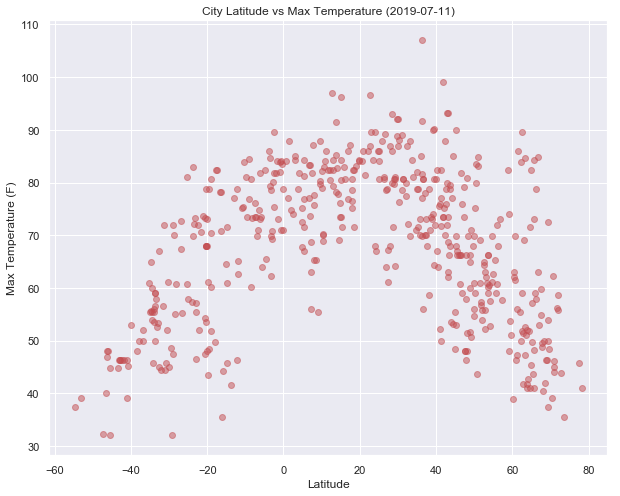

In [10]:
#Latitude vs Temperature Plot
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()

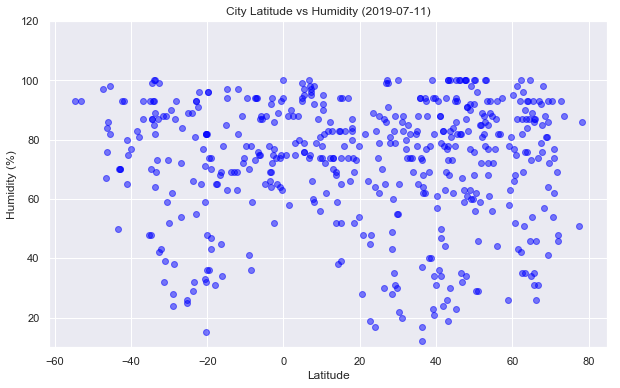

In [11]:
#Latitude vs. Humidity Plot
plt.figure(figsize=(10,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

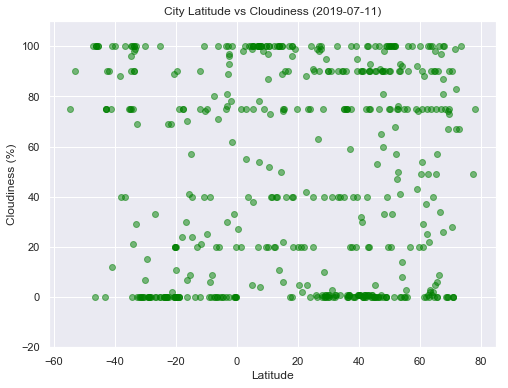

In [12]:
#Latitude vs. Cloudiness Plot
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)

plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

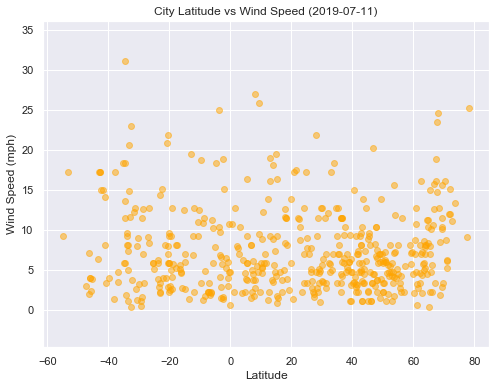

In [13]:
#Latitude vs. Wind Speed Plot
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='orange', alpha=0.5)

plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWind.png")
plt.show()

Analysis

Trend 1: Temperatures get more colder as we move up towards the northern hemisphere
compared to the temperatures as we move down towards southern hemisphere.

Trend 2: Latitude has direct affect on the temperatures and not so much on humidity, cloudiness and windspeed directly. 
